#This dataset is about the information reagerding call of duty game

#It is AN unlabelled dataset and hence we are going to implement clustering algorithm here

#K-Means clustering is the algorithm thal will be used for this dataset

#1.Importing all necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
from sklearn.metrics import silhouette_score

#2.Importing dataset

In [2]:
# UNSUPERVISED
data = pd.read_csv(r'D:\DATASCIENCE\MYPROJECT\MLProjects\cod.csv')
df=pd.DataFrame(data)
print(df.to_string())

                                      name  wins  kills   kdRatio  killstreak  level  losses  prestige    hits  timePlayed  headshots  averageTime  gamesPlayed  assists  misses        xp  scorePerMinute    shots  deaths
0                          RggRt45#4697369     0      0  0.000000           0      1       0         0       0           0          0     0.000000            0        0       0         0        0.000000        0       0
1                       JohniceRex#9176033     0      0  0.000000           0      1       0       110       0           7          0     7.000000            0        0       0       700        0.000000        0      16
2                   bootybootykill#1892064     0     66  1.031250           0      9       0       110       0          32         16    32.000000            0        1       0     48300        0.000000        0      64
3                            JNaCo#5244172     3      2  0.400000           0      1       0         0       0          

#3.Select features for x

In [3]:
x = df.iloc[:, 1:].values

#4.Finding optimal numbers of clusters using the elbow method

In [4]:
from sklearn.cluster import KMeans
wcss_list= []

#Intializing the list for the values of WCSS

#Using for loop for iteration from 1 to 10.

c:\Users\jassi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jassi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jassi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jassi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[5059392698915742.0, 1402330940599751.8, 663255223803442.0, 426067793066752.9, 264628846777893.16, 182125810428667.84, 137783507365041.22, 109672020427079.31, 89342881221937.9, 69519372398130.63]


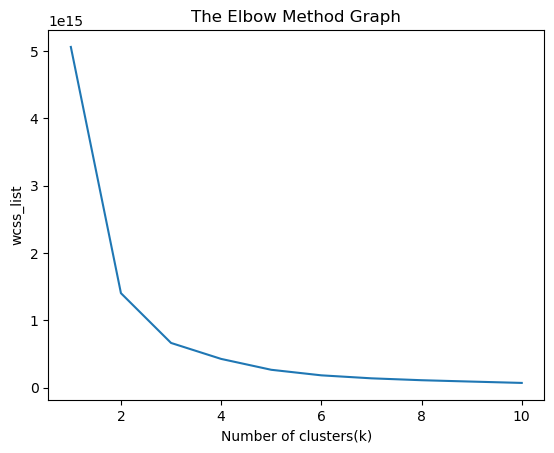

In [5]:
for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
   kmeans.fit(x)
   wcss_list.append(kmeans.inertia_)
print(wcss_list)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

#From the Elbow Method,we observed asharp bent at the value 3,Hence we take K as 3

#5.Training the K-means model on a dataset

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)
print(y_predict)

c:\Users\jassi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 0 0]


#To access the clustering performance,we use a metric known as Silhouette Score


#6.Finding Silhouette score

In [7]:
print(silhouette_score(x, kmeans.fit_predict(x)))

c:\Users\jassi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.8002425390798784


#We have observed that the silhouette score of this model is 0.800 which  is considered to be strong and hence our clustering result is well defined.